# Exploration liste des polluants - A. HAMIDOVIC Février 2024

Ce notebook a pour but d'explorer la liste des polluants retrouvés dans des prélèvements d'eau potable sur à des tests réalisés entre 2020 et 2024.

## 1. Import des tables depuis la BDD et visualisation des tables

In [1]:
# Import des librairies nécessaires pour l'analyse des données.

import duckdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pipelines.tasks._common import DUCKDB_FILE

In [2]:
con = duckdb.connect(database=DUCKDB_FILE, read_only=True)

Pour diminuer le temps de traitement et ne pas saturer la mémoire, des dataframes comprenant les prélèvements et les résultats associés par année ont été chargés.

In [3]:
query_2024 = """
SELECT
  "edc_prelevements"."referenceprel",
  "edc_prelevements"."dateprel",
  "edc_prelevements"."nomcommuneprinc",
  "edc_resultats"."libmajparametre",
  "edc_resultats"."de_partition",
  "edc_resultats"."insituana",
  "edc_resultats"."rqana",
  "edc_resultats"."cdunitereferencesiseeaux"
FROM (
  SELECT
    *
  FROM "edc_prelevements") AS edc_prelevements
INNER JOIN "edc_resultats"
  ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
WHERE dateprel >= '2024-01-01'
"""

df_2024 = con.sql(query_2024)
df_2024 = df_2024.df()
display(df_2024)

,referenceprel,dateprel,nomcommuneprinc,libmajparametre,de_partition,insituana,rqana,cdunitereferencesiseeaux
0,00600252704,2024-06-18,CROIX-SUR-ROUDOULE (LA),"INDÉNO(1,2,3-CD)PYRÈNE",2024,L,"<0,0005",µg/L
1,00600252704,2024-06-18,CROIX-SUR-ROUDOULE (LA),AMMONIUM (EN NH4),2024,L,"<0,05",mg/L
2,00600252704,2024-06-18,CROIX-SUR-ROUDOULE (LA),NICKEL,2024,L,<5,µg/L
3,00600252704,2024-06-18,CROIX-SUR-ROUDOULE (LA),NITRITES (EN NO2),2024,L,"<0,02",mg/L
4,00600252704,2024-06-18,CROIX-SUR-ROUDOULE (LA),ODEUR (QUALITATIF),2024,L,Aucun changement anormal,SANS OBJET
...,...,...,...,...,...,...,...,...
18774082,97400137504,2024-04-19,TAMPON (LE),ENTÉROCOQUES /100ML-MS,2024,L,<1,n/(100mL)
18774083,97400137504,2024-04-19,TAMPON (LE),TITRE ALCALIMÉTRIQUE,2024,L,"<2,0",°f
18774084,97400137504,2024-04-19,TAMPON (LE),TEMPÉRATURE DE L'EAU (DOM),2024,T,"23,2",°C
18774085,97400137504,2024-04-19,TAMPON (LE),TEMPÉRATURE DE MESURE DU PH,2024,T,"22,8",°C


In [4]:
query_2023 = """
SELECT
  "edc_prelevements"."referenceprel",
  "edc_prelevements"."dateprel",
  "edc_prelevements"."nomcommuneprinc",
  "edc_resultats"."libmajparametre",
  "edc_resultats"."de_partition",
  "edc_resultats"."insituana",
  "edc_resultats"."rqana",
  "edc_resultats"."cdunitereferencesiseeaux"
FROM (
  SELECT
    *
  FROM "edc_prelevements") AS edc_prelevements
INNER JOIN "edc_resultats"
  ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
WHERE dateprel >= '2023-01-01' and dateprel < '2024-01-01'
"""

df_2023 = con.sql(query_2023)
df_2023 = df_2023.df()
display(df_2023)

,referenceprel,dateprel,nomcommuneprinc,libmajparametre,de_partition,insituana,rqana,cdunitereferencesiseeaux
0,00100133928,2023-03-28,CONZIEU,ASPECT (QUALITATIF),2023,L,Aspect normal,SANS OBJET
1,00100133928,2023-03-28,CONZIEU,BACT. ET SPORES SULFITO-RÉDU./100ML,2023,L,<1,n/(100mL)
2,00100133928,2023-03-28,CONZIEU,CONDUCTIVITÉ À 25°C,2023,L,492,µS/cm
3,00100133928,2023-03-28,CONZIEU,CHLORURES,2023,L,"2,3",mg/L
4,00100133928,2023-03-28,CONZIEU,CHLORE LIBRE,2023,T,"<0,03",mg(Cl2)/L
...,...,...,...,...,...,...,...,...
19489759,09200136780,2023-03-02,SURESNES,ENTÉROCOQUES /100ML-MS,2023,L,<1,n/(100mL)
19489760,09200136780,2023-03-02,SURESNES,TITRE ALCALIMÉTRIQUE COMPLET,2023,L,"16,85",°f
19489761,09200136780,2023-03-02,SURESNES,TEMPÉRATURE DE L'EAU,2023,T,"8,7",°C
19489762,09200136780,2023-03-02,SURESNES,TITRE HYDROTIMÉTRIQUE,2023,L,"17,45",°f


In [5]:
query_2022 = """
SELECT
  "edc_prelevements"."referenceprel",
  "edc_prelevements"."dateprel",
  "edc_prelevements"."nomcommuneprinc",
  "edc_resultats"."libmajparametre",
  "edc_resultats"."de_partition",
  "edc_resultats"."insituana",
  "edc_resultats"."rqana",
  "edc_resultats"."cdunitereferencesiseeaux"
FROM (
  SELECT
    *
  FROM "edc_prelevements") AS edc_prelevements
INNER JOIN "edc_resultats"
  ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
WHERE dateprel >= '2022-01-01' and dateprel < '2023-01-01'
"""

df_2022 = con.sql(query_2022)
df_2022 = df_2022.df()
display(df_2022)

,referenceprel,dateprel,nomcommuneprinc,libmajparametre,de_partition,insituana,rqana,cdunitereferencesiseeaux
0,00600240199,2022-09-12,PEONE,METHOXYFENOSIDE,2022,L,"<0,050",µg/L
1,00600240199,2022-09-12,PEONE,MÉTAMITRONE,2022,L,"<0,005",µg/L
2,00600240199,2022-09-12,PEONE,MÉTHOMYL,2022,L,"<0,005",µg/L
3,00600240199,2022-09-12,PEONE,ESA METAZACHLORE,2022,L,"<0,020",µg/L
4,00600240199,2022-09-12,PEONE,OXA METAZACHLORE,2022,L,"<0,020",µg/L
...,...,...,...,...,...,...,...,...
20100814,09200136056,2022-12-02,SURESNES,TETRADIFON,2022,L,"<0,005",µg/L
20100815,09200136056,2022-12-02,SURESNES,UNICONAZOLE,2022,L,"<0,005",µg/L
20100816,09200136056,2022-12-02,SURESNES,VALIFENALATE,2022,L,"<0,005",µg/L
20100817,09200136056,2022-12-02,SURESNES,VAMIDOTHION,2022,L,"<0,005",µg/L


In [6]:
query_2021 = """
SELECT
  "edc_prelevements"."referenceprel",
  "edc_prelevements"."dateprel",
  "edc_prelevements"."nomcommuneprinc",
  "edc_resultats"."libmajparametre",
  "edc_resultats"."de_partition",
  "edc_resultats"."insituana",
  "edc_resultats"."rqana",
  "edc_resultats"."cdunitereferencesiseeaux"
FROM (
  SELECT
    *
  FROM "edc_prelevements") AS edc_prelevements
INNER JOIN "edc_resultats"
  ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
WHERE dateprel >= '2021-01-01' and dateprel < '2022-01-01'
"""

df_2021 = con.sql(query_2021)
df_2021 = df_2021.df()
display(df_2021)

,referenceprel,dateprel,nomcommuneprinc,libmajparametre,de_partition,insituana,rqana,cdunitereferencesiseeaux
0,00400126512,2021-05-20,ROUGON,PH,2021,T,"7,7",unité pH
1,00400126512,2021-05-20,ROUGON,SAVEUR (QUALITATIF),2021,L,Aucun changement anormal,SANS OBJET
2,00400126512,2021-05-20,ROUGON,ENTÉROCOQUES /100ML-MS,2021,L,<1,n/(100mL)
3,00400126512,2021-05-20,ROUGON,TEMPÉRATURE DE L'EAU,2021,T,"11,4",°C
4,00400126512,2021-05-20,ROUGON,TURBIDITÉ NÉPHÉLOMÉTRIQUE NFU,2021,L,"0,13",NFU
...,...,...,...,...,...,...,...,...
20121152,09100185544,2021-12-22,MORSANG-SUR-SEINE,ENTÉROCOQUES /100ML-MS,2021,L,<1,n/(100mL)
20121153,09100185544,2021-12-22,MORSANG-SUR-SEINE,TITRE ALCALIMÉTRIQUE COMPLET,2021,L,"19,30",°f
20121154,09100185544,2021-12-22,MORSANG-SUR-SEINE,TEMPÉRATURE DE L'EAU,2021,T,"7,5",°C
20121155,09100185544,2021-12-22,MORSANG-SUR-SEINE,TITRE HYDROTIMÉTRIQUE,2021,L,"24,62",°f


In [7]:
query_2020 = """
SELECT
  "edc_prelevements"."referenceprel",
  "edc_prelevements"."dateprel",
  "edc_prelevements"."nomcommuneprinc",
  "edc_resultats"."libmajparametre",
  "edc_resultats"."de_partition",
  "edc_resultats"."insituana",
  "edc_resultats"."rqana",
  "edc_resultats"."cdunitereferencesiseeaux"
FROM (
  SELECT
    *
  FROM "edc_prelevements") AS edc_prelevements
INNER JOIN "edc_resultats"
  ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
WHERE dateprel >= '2020-01-01' and dateprel < '2021-01-01'
"""

df_2020 = con.sql(query_2020)
df_2020 = df_2020.df()
display(df_2020)

,referenceprel,dateprel,nomcommuneprinc,libmajparametre,de_partition,insituana,rqana,cdunitereferencesiseeaux
0,00200179905,2020-05-19,CHEZY-SUR-MARNE,TÉTRACHLOROÉTHYLÈN+TRICHLOROÉTHYLÈN,2020,L,"<0,50",µg/L
1,00200179905,2020-05-19,CHEZY-SUR-MARNE,TÉTRACHLORURE DE CARBONE,2020,L,"<0,50",µg/L
2,00200179905,2020-05-19,CHEZY-SUR-MARNE,TRICHLOROÉTHYLÈNE,2020,L,"<0,50",µg/L
3,00200179905,2020-05-19,CHEZY-SUR-MARNE,TELLURE,2020,L,"<0,01",µg/L
4,00200179905,2020-05-19,CHEZY-SUR-MARNE,TEMPÉRATURE DE L'EAU,2020,T,15,°C
...,...,...,...,...,...,...,...,...
18994003,09200125350,2020-12-28,SURESNES,ENTÉROCOQUES /100ML-MS,2020,L,<1,n/(100mL)
18994004,09200125350,2020-12-28,SURESNES,TITRE ALCALIMÉTRIQUE COMPLET,2020,L,"15,00",°f
18994005,09200125350,2020-12-28,SURESNES,TEMPÉRATURE DE L'EAU,2020,T,"8,7",°C
18994006,09200125350,2020-12-28,SURESNES,TITRE HYDROTIMÉTRIQUE,2020,L,"17,45",°f


## 2. Visualisations générales

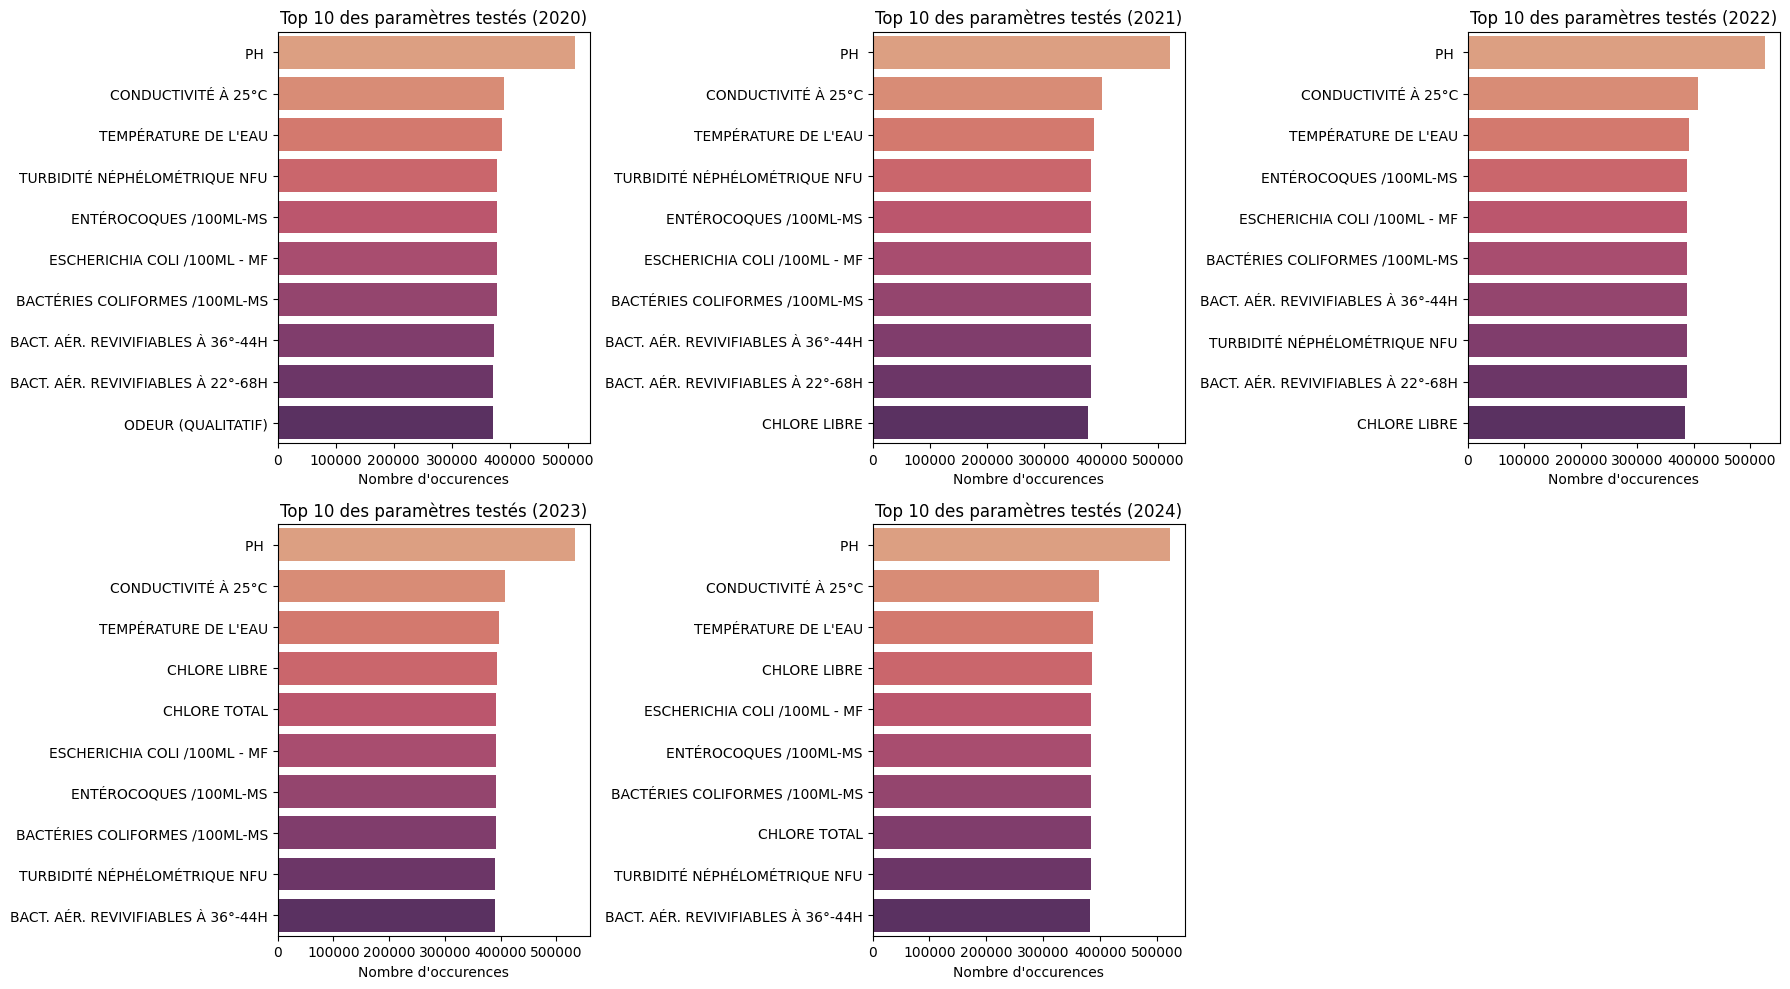

In [ ]:
# Top 10 des paramètres testés les plus fréquents par année

dataframes = [df_2020, df_2021, df_2022, df_2023, df_2024]
annees = ["2020", "2021", "2022", "2023", "2024"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, (df, annee) in enumerate(zip(dataframes, annees)):
    frequence_test = df["libmajparametre"].value_counts()

    sns.barplot(
        x=frequence_test.values[:10],
        y=frequence_test.index[:10],
        hue=frequence_test.index[:10],
        palette="flare",
        ax=axes[i],
    )
    axes[i].set_title(f"Top 10 des paramètres testés ({annee})")
    axes[i].set_xlabel("Nombre d'occurences")
    axes[i].set_ylabel("")

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [ ]:
# Filtrage des substances par recherche texte
categories_polluants = {
    "pesticides": [
        "azine",
        "phos",
        "triazine",
        "glyphosate",
        "atrazine",
        "metolachlor",
    ],
    "nitrates et nitrites": ["nitrate", "nitrite"],
    "PFAS": ["fluoro", "perfluoro", "PFOA", "PFOS"],
    "phtalates": ["phtalate", "DEHP", "BBP", "DBP"],
    "chlorure de vinyle": ["chlorure de vinyle"],
    "hydrocarbures": ["benzène", "toluène", "naphtalène", "xylène"],
    "métaux lourds": ["mercure", "plomb", "arsenic", "cadmium", "nickel", "chrome"],
}


In [ ]:
# Catégorisation
mapping_categories = pd.read_csv(
    "https://s3.fr-par.scw.cloud/pollution-eau-s3/upload/mapping_categories.csv"
)
display(mapping_categories)

,cdparametresiseeaux,cdparametre,libmajparametre,libminparametre,casparam,categorie
0,PESTOT,6276.0,TOTAL DES PESTICIDES ANALYSÉS,Total des pesticides analysés,NaN,pesticides
1,ATRZ,1107.0,ATRAZINE,Atrazine,1912-24-9,pesticides
2,SMZ,1263.0,SIMAZINE,Simazine,122-34-9,pesticides
3,MTC,1221.0,MÉTOLACHLORE,Métolachlore,51218-45-2,pesticides
4,TBZ,1268.0,TERBUTHYLAZIN,Terbuthylazin,5915-41-3,pesticides
...,...,...,...,...,...,...
824,SPFAS,8847.0,SOMME DE 20 PFAS,Somme de 20 substances perfluoroalkylées (PFAS),NaN,pfas
825,PFHPA,5977.0,ACIDE PERFLUOROHEPTANOÏQUE,Acide perfluoroheptanoïque,375-85-9,pfas
826,PFOS,6561.0,ACIDE SULFONIQUE DE PERFLUOROOCTANE,Acide sulfonique de perfluorooctane,1763-23-1,pfas
827,ASPFOS,6560.0,ACIDE PERFLUOROOCTANE SULFONIQUE,Acide perfluorooctane sulfonique (PFOS),1763-23-1,pfas


In [ ]:
resultats_table_2024 = df_2024.merge(
    mapping_categories[["libmajparametre", "categorie"]],
    on="libmajparametre",
    how="left",
)

/var/folders/k7/bwwlkzbs4d1bbxw9drfptg2m0000gn/T/ipykernel_4537/1151949732.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Catégorie", bbox_to_anchor=(1.05, 1), loc="upper left")


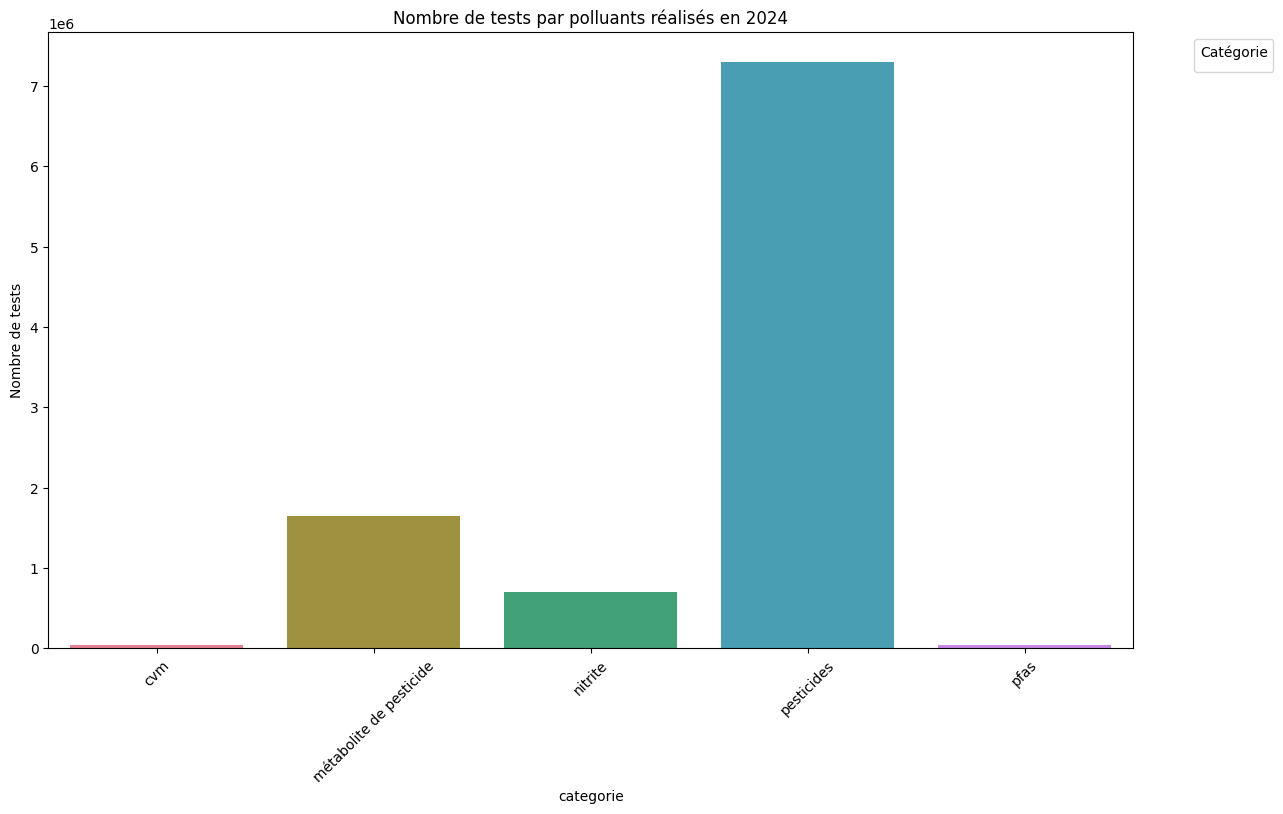

In [16]:
# Visualisation des polluants testés en fonction de l'année
count_tests = (
    resultats_table_2024.groupby("categorie").size().reset_index(name="nb_tests")
)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=count_tests, x="categorie", y="nb_tests", hue="categorie", palette="husl"
)
plt.title("Nombre de tests par polluants réalisés en 2024")
plt.ylabel("Nombre de tests")
plt.legend(title="Catégorie", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()